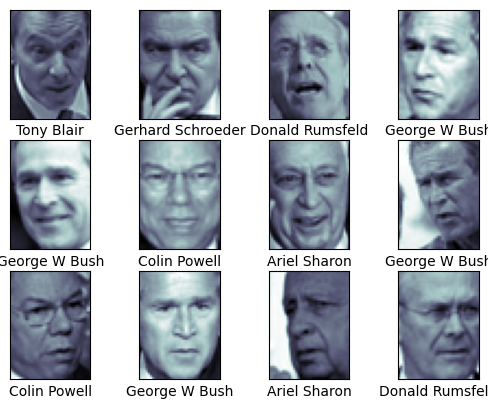

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.76      0.70        21
     Colin Powell       0.76      0.82      0.79        77
  Donald Rumsfeld       0.69      0.75      0.72        32
    George W Bush       0.85      0.81      0.83       162
Gerhard Schroeder       0.69      0.80      0.74        30
      Hugo Chavez       0.86      0.57      0.69        21
   Jacques Chirac       0.77      0.59      0.67        17
    Jean Chretien       0.76      0.94      0.84        17
    John Ashcroft       0.69      0.58      0.63        19
Junichiro Koizumi       0.69      0.69      0.69        13
  Serena Williams       0.67      0.62      0.64        13
       Tony Blair       0.74      0.74      0.74        46

         accuracy                           0.77       468
        macro avg       0.73      0.72      0.72       468
     weighted avg       0.77      0.77      0.77       468

[[ 16   1   0   1   1   0   0   1   0   0   1   0]
 [

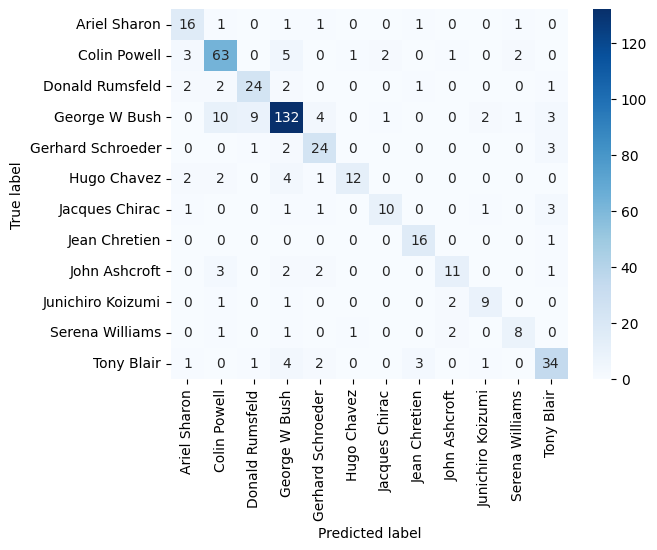

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

import matplotlib.pyplot as plt

# 加载数据
faces = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# 可视化部分图像
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_names[labels[i]])
plt.show()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 标准化数据
scaler = StandardScaler()
faces_scaled = scaler.fit_transform(faces.reshape(faces.shape[0], -1))

# PCA降维
pca = PCA(n_components=150, whiten=True)
faces_pca = pca.fit_transform(faces_scaled)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(faces_pca, labels, test_size=0.3, random_state=42)

# 训练SVM分类器
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

# 预测
y_pred = svm.predict(X_test)

# 评估
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))

# 查看准确率
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Total dataset size:
n_samples: 1560
n_features: 1850
n_classes: 12
Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.75      0.77        16
     Colin Powell       0.81      0.92      0.87        66
  Donald Rumsfeld       0.68      0.85      0.75        27
    George W Bush       0.97      0.79      0.87       140
Gerhard Schroeder       0.76      0.92      0.83        24
      Hugo Chavez       0.87      0.76      0.81        17
   Jacques Chirac       0.88      0.70      0.78        10
    Jean Chretien       0.71      0.86      0.77        14
    John Ashcroft       0.68      0.81      0.74        16
Junichiro Koizumi       0.90      0.82      0.86        11
  Serena Williams       0.60      0.67      0.63         9
       Tony Blair       0.82      0.90      0.86        40

         accuracy                           0.83       390
        macro avg       0.79      0.81      0.80       390
     weighted avg      

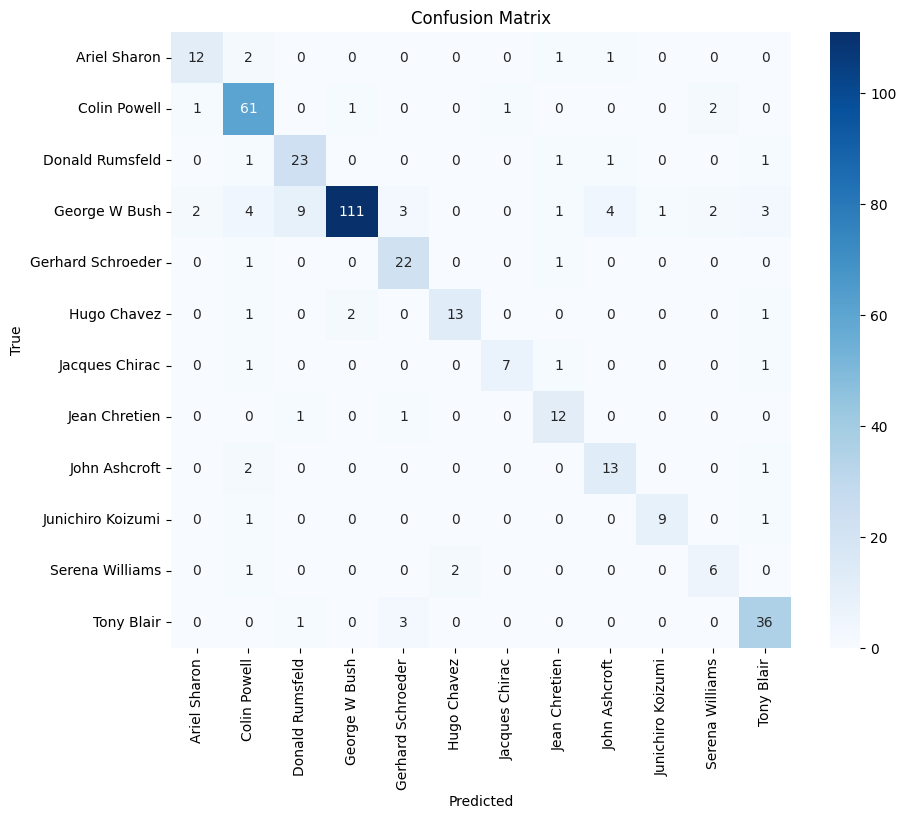

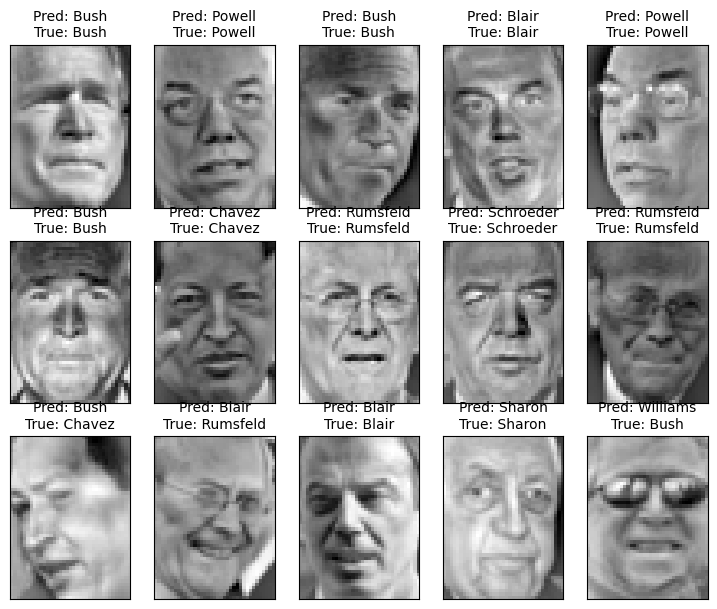

0.8333333333333334

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

# 1. 加载 LFW 数据集
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

# 获取图像数据和标签
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

print(f"Total dataset size:")
print(f"n_samples: {X.shape[0]}")
print(f"n_features: {X.shape[1]}")
print(f"n_classes: {n_classes}")

# 2. 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3. 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. 进行 PCA 降维 (为了避免过拟合，先用 PCA 降维)
from sklearn.decomposition import PCA

n_components = 150  # 保留的主成分数量，可根据实际情况调整
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 5. 使用 LDA 提取 FisherFace 特征
lda = LDA(n_components=n_classes - 1)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

# 6. 训练分类器 (SVM)
classifier = SVC(kernel='rbf', class_weight='balanced', probability=True)
classifier.fit(X_train_lda, y_train)

# 7. 在测试集上进行预测
y_pred = classifier.predict(X_test_lda)

# 8. 输出结果
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 9. 绘制混淆矩阵
cm2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 10. 显示部分预测结果
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        if i >= images.shape[0]:
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

h = lfw_dataset.images.shape[1]
w = lfw_dataset.images.shape[2]

prediction_titles = [
    f"Pred: {target_names[y_pred[i]].split()[-1]}\nTrue: {target_names[y_test[i]].split()[-1]}"
    for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)
plt.show()

accuracy_score(y_test, y_pred)

样本数量: 1560
类别数量: 12


d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------


100%|██████████| 39/39 [00:02<00:00, 13.97it/s]


Train Loss: 2.2259 Acc: 0.3253
Val Loss: 2.1869 Acc: 0.3397

Epoch 2/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.73it/s]


Train Loss: 2.1509 Acc: 0.3381
Val Loss: 2.2806 Acc: 0.3365

Epoch 3/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.64it/s]


Train Loss: 2.1565 Acc: 0.3413
Val Loss: 2.1726 Acc: 0.3397

Epoch 4/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.64it/s]


Train Loss: 2.1570 Acc: 0.3389
Val Loss: 2.1642 Acc: 0.3301

Epoch 5/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.62it/s]


Train Loss: 2.1274 Acc: 0.3373
Val Loss: 2.1749 Acc: 0.3365

Epoch 6/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.79it/s]


Train Loss: 2.0982 Acc: 0.3454
Val Loss: 2.1348 Acc: 0.3365

Epoch 7/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.72it/s]


Train Loss: 2.0797 Acc: 0.3494
Val Loss: 2.1358 Acc: 0.3397

Epoch 8/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.54it/s]


Train Loss: 2.0808 Acc: 0.3502
Val Loss: 2.1339 Acc: 0.3365

Epoch 9/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.88it/s]


Train Loss: 2.0825 Acc: 0.3462
Val Loss: 2.1355 Acc: 0.3365

Epoch 10/10
----------


100%|██████████| 39/39 [00:02<00:00, 15.96it/s]


Train Loss: 2.0847 Acc: 0.3446
Val Loss: 2.1342 Acc: 0.3397



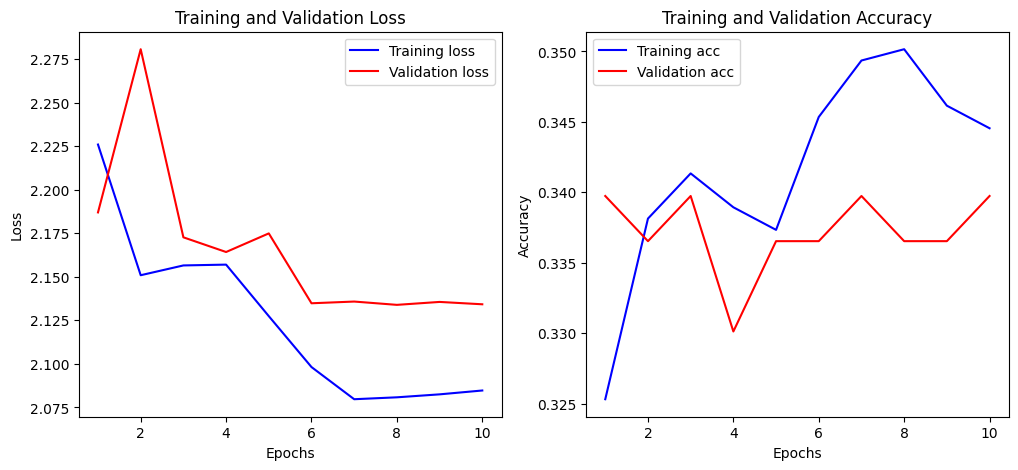

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.40      0.04      0.08        47
  Donald Rumsfeld       0.00      0.00      0.00        24
    George W Bush       0.34      0.98      0.51       106
Gerhard Schroeder       0.00      0.00      0.00        22
      Hugo Chavez       0.00      0.00      0.00        14
   Jacques Chirac       0.00      0.00      0.00        10
    Jean Chretien       0.00      0.00      0.00        11
    John Ashcroft       0.00      0.00      0.00        11
Junichiro Koizumi       0.00      0.00      0.00        12
  Serena Williams       0.00      0.00      0.00        10
       Tony Blair       0.00      0.00      0.00        29

         accuracy                           0.34       312
        macro avg       0.06      0.09      0.05       312
     weighted avg       0.18      0.34      0.18       312



d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


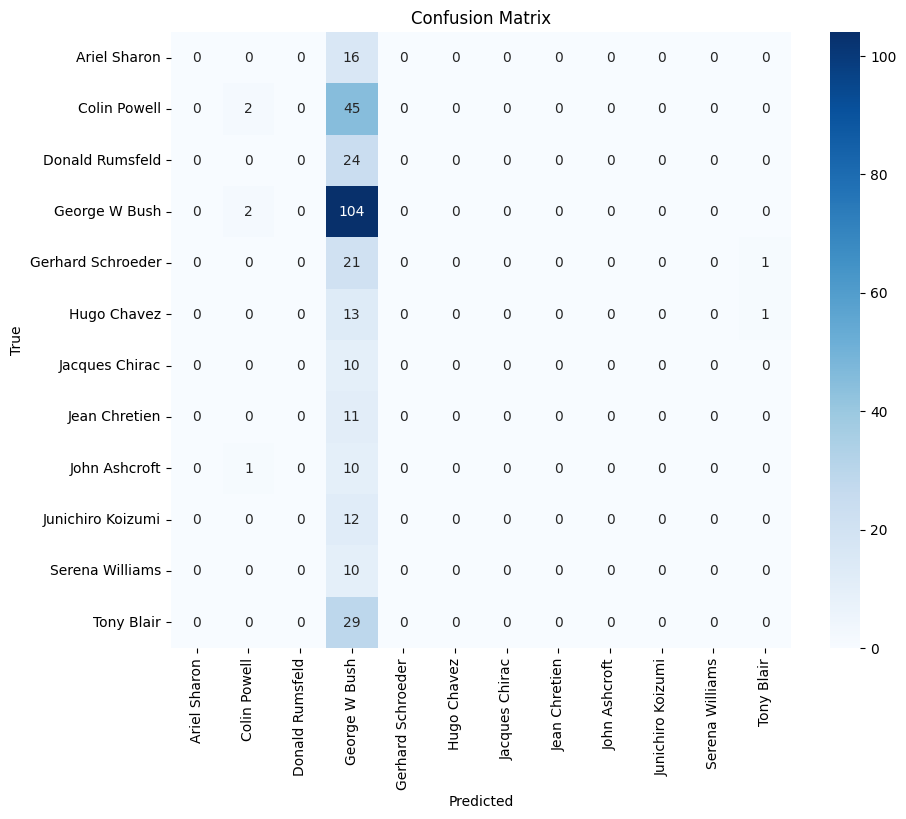

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

from PIL import Image
from tqdm import tqdm
import random
class LFWDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images  # 图像数据，NumPy 数组
        self.labels = labels  # 标签，整数编码
        self.transform = transform  # 数据预处理和增强

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # 确保图像数据类型为 uint8
        image = image.astype(np.uint8)

        if self.transform:
            image = self.transform(image)

        return image, label
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)
# 加载 LFW 数据集，只选择至少包含 50 张图片的人员
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.5, color=True)

# 获取图像和标签
X = lfw_dataset.images  # 图像数据，形状为 (n_samples, h, w, 3)
y = lfw_dataset.target  # 标签，形状为 (n_samples,)
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

print(f"样本数量: {X.shape[0]}")
print(f"类别数量: {n_classes}")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=random_seed, stratify=y_encoded
)
# 定义数据增强和预处理操作
transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),      # 随机旋转 +/-10 度
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],     # ImageNet 数据集的均值
        std=[0.229, 0.224, 0.225]       # ImageNet 数据集的标准差
    ),
])

transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])
batch_size = 32

train_dataset = LFWDataset(X_train, y_train, transform=transform_train)
test_dataset = LFWDataset(X_test, y_test, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
# 使用预训练的 ResNet-18 模型
model = models.resnet18(pretrained=True)
# 冻结模型的前面层参数
for param in model.parameters():
    param.requires_grad = False

# 获取原始全连接层的输入特征数
num_ftrs = model.fc.in_features

# 替换全连接层，使其输出大小等于类别数
model.fc = nn.Linear(num_ftrs, n_classes)
# 选择使用 GPU 或 CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# 学习率调度器（可选）
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 10

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    # 训练阶段
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 零参数梯度
        optimizer.zero_grad()

        # 前向传播
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        loss.backward()
        optimizer.step()

        # 统计损失和正确预测数
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc.item())

    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # 验证阶段
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            val_running_corrects += torch.sum(preds == labels.data)

    val_loss = val_running_loss / len(test_dataset)
    val_acc = val_running_corrects.double() / len(test_dataset)

    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc.item())

    print(f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}\n")

    # 更新学习率
    scheduler.step()
# 绘制损失和准确率曲线
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, 'b', label='Training loss')
plt.plot(epochs, val_loss_history, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc_history, 'b', label='Training acc')
plt.plot(epochs, val_acc_history, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# 在测试集上评估模型性能
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# 输出分类报告
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# 绘制混淆矩阵
cm3 = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\App\Anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 390/390 [00:04<00:00, 81.68it/s]


Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.68      0.79        19
     Colin Powell       0.76      0.93      0.84        59
  Donald Rumsfeld       0.81      0.70      0.75        30
    George W Bush       0.90      0.95      0.93       133
Gerhard Schroeder       0.81      0.81      0.81        27
      Hugo Chavez       0.92      0.61      0.73        18
   Jacques Chirac       0.78      0.54      0.64        13
    Jean Chretien       0.91      0.71      0.80        14
    John Ashcroft       0.71      0.92      0.80        13
Junichiro Koizumi       0.86      0.80      0.83        15
  Serena Williams       0.89      0.62      0.73        13
       Tony Blair       0.79      0.83      0.81        36

         accuracy                           0.84       390
        macro avg       0.84      0.76      0.79       390
     weighted avg       0.8

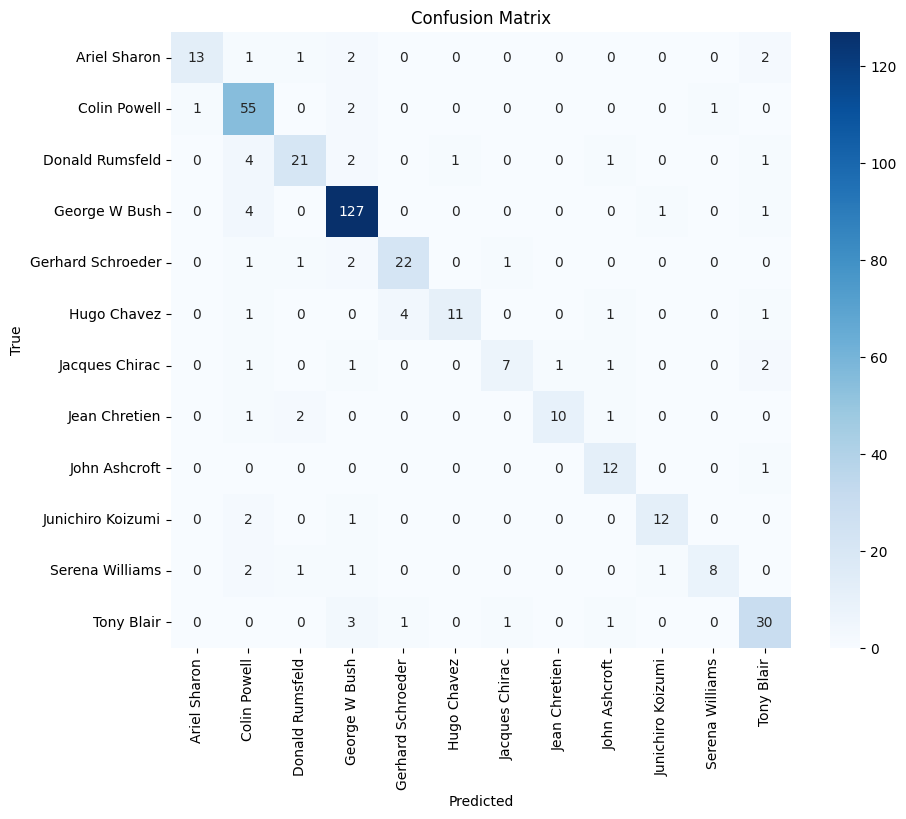

0.841025641025641

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
from torchvision import models, transforms
from tqdm import tqdm
from sklearn.metrics import accuracy_score 

# 1. 导入必要的库（确保已导入这些库）
import numpy as np
import torch
import torchvision.transforms as transforms
from tqdm import tqdm

# 2. 加载数据集
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X = lfw_dataset.images
y = lfw_dataset.target
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

# 3. 数据预处理
n_samples, h, w = X.shape
X_flat = X.reshape(n_samples, -1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. 分割数据集
X_train_flat, X_test_flat, X_train_img, X_test_img, y_train, y_test = train_test_split(
    X_flat, X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# 5. 提取 EigenFace 特征（代码与之前相同）
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)
n_components_pca = 150
pca = PCA(n_components=n_components_pca, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train_flat_scaled)
X_test_pca = pca.transform(X_test_flat_scaled)

# 6. 提取 FisherFace 特征（代码与之前相同）
lda = LDA(n_components=n_classes - 1)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

# 7. 提取 ResNet 特征（修改部分）
# 定义图像预处理
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # 预训练 ResNet 模型的均值
        std=[0.229, 0.224, 0.225]     # 预训练 ResNet 模型的标准差
    ),
])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = models.resnet50(pretrained=True)
resnet = resnet.to(device)
resnet.eval()
resnet_feature_extractor = nn.Sequential(*list(resnet.children())[:-1])
resnet_feature_extractor = resnet_feature_extractor.to(device)

def extract_resnet_features(X_images):
    features = []
    with torch.no_grad():
        for img in tqdm(X_images):
            img_rgb = np.stack([img, img, img], axis=2)  # 灰度图转为 RGB
            img_rgb = img_rgb.astype(np.uint8)  # 转换数据类型为 uint8
            img_tensor = transform(img_rgb)
            img_tensor = img_tensor.unsqueeze(0).to(device)
            feature = resnet_feature_extractor(img_tensor)
            feature_np = feature.cpu().numpy().flatten()
            features.append(feature_np)
    return np.array(features)

X_train_resnet = extract_resnet_features(X_train_img)
X_test_resnet = extract_resnet_features(X_test_img)

# 8. 特征融合（代码与之前相同）
from sklearn.preprocessing import normalize
X_train_pca_norm = normalize(X_train_pca)
X_test_pca_norm = normalize(X_test_pca)
X_train_lda_norm = normalize(X_train_lda)
X_test_lda_norm = normalize(X_test_lda)
X_train_resnet_norm = normalize(X_train_resnet)
X_test_resnet_norm = normalize(X_test_resnet)
X_train_combined = np.hstack((X_train_pca_norm, X_train_lda_norm, X_train_resnet_norm))
X_test_combined = np.hstack((X_test_pca_norm, X_test_lda_norm, X_test_resnet_norm))

# 9. 分类器训练和优化（代码与之前相同）
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
clf = GridSearchCV(SVC(class_weight='balanced', probability=True), param_grid, cv=5)
clf.fit(X_train_combined, y_train)
print(f"Best parameters: {clf.best_params_}")

# 10. 模型评估（代码与之前相同）
y_pred = clf.predict(X_test_combined)
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 绘制混淆矩阵（代码与之前相同）
cm4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy_score(y_test, y_pred)

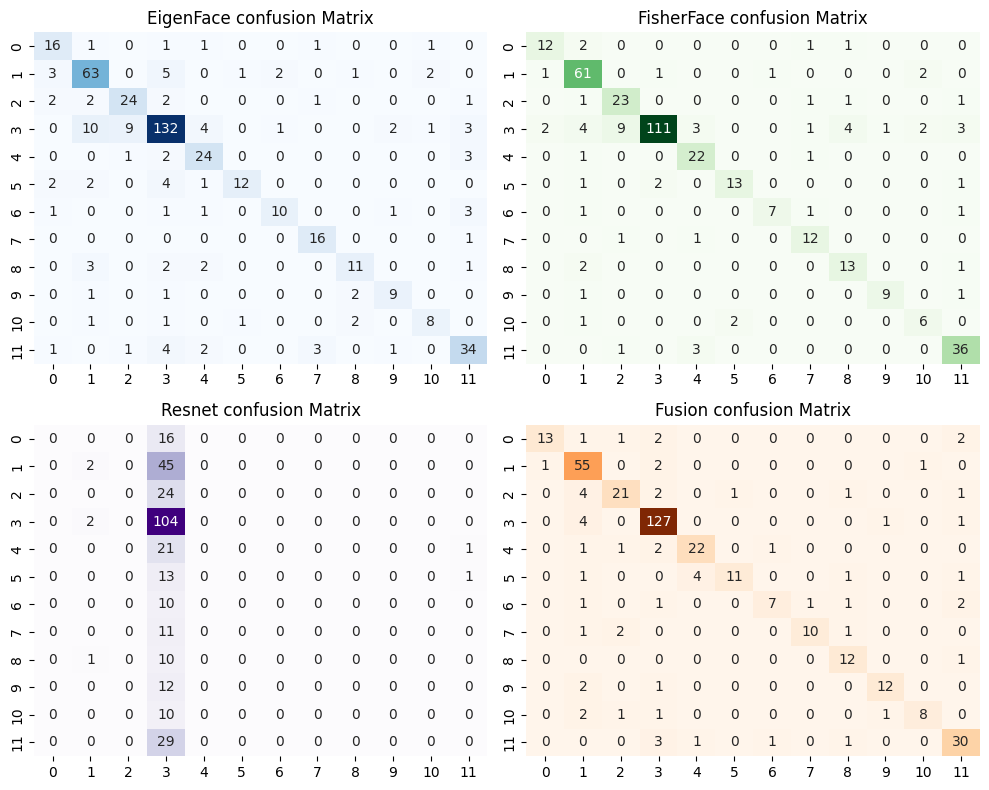

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# 绘制混淆矩阵
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0], cbar=False)
axs[0, 0].set_title('EigenFace confusion Matrix')
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axs[0, 1], cbar=False)
axs[0, 1].set_title('FisherFace confusion Matrix')
sns.heatmap(cm3, annot=True, fmt='d', cmap='Purples', ax=axs[1, 0], cbar=False)
axs[1, 0].set_title('Resnet confusion Matrix')
sns.heatmap(cm4, annot=True, fmt='d', cmap='Oranges', ax=axs[1, 1], cbar=False)
axs[1, 1].set_title('Fusion confusion Matrix')

# 设置整体标题
# plt.title("Comparison of four feature extraction algorithms")
plt.tight_layout()
plt.show()